In [72]:
from neurosynth import meta, decode, network, Dataset
import pandas
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler
from nilearn import plotting
import nilearn
import pickle
import cortex
from scipy import spatial


In [73]:
dataset = pickle.load( open( "dataset.p", "rb" ) )
# dataset = Dataset('neurosynth-data/database.txt')

In [74]:
terms = pandas.read_csv('neurosynth-data//analysis_filter_list.tsv',delimiter='\t')

In [75]:
kept_terms = terms['term'][terms['keep']==1]
np.savez("neurosynth_terms",'kept_terms')

In [ ]:
# maps = {}
# for term in kept_terms:
#     ids = dataset.get_studies(term)
#     ma = meta.MetaAnalysis(dataset, ids)
#     maps[term] = ma.images['association-test_z']
#     ma.save_results(os.path.join('neurosynth-data','maps',term))
    

In [ ]:
# concat_maps = np.vstack((maps[k] for k in maps.keys()))


In [76]:
concat_maps = pickle.load(open("concat_maps.p","rb"))

In [77]:
pca = PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False).fit(concat_maps)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[0.10724451 0.07186315 0.04695774 0.03718591 0.03011859 0.02566107
 0.01888798 0.01386358 0.01315753 0.01177422]
[7371.67572625 6034.36808339 4877.89306864 4340.78108748 3906.57327303
 3605.9198214  3093.65168397 2650.43018515 2582.05705093 2442.55709174]


In [78]:
components = np.array([dataset.masker.unmask(pca.components_[i],output='array') for i in range(10)])
np.savez('components',components)

In [79]:
term_weights = pca.transform(concat_maps)
np.savez('term_weights',term_weights)

In [80]:
a = term_weights[:,5].argsort()[::-1]

Exctract Convex Hull of first 3 components

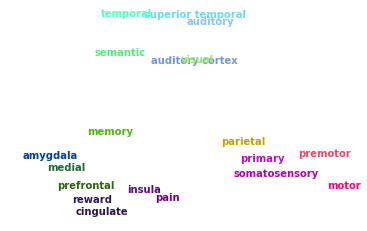

In [81]:
first_three = term_weights[:,:3]
hull = spatial.ConvexHull(first_three)
vertices = first_three[hull.vertices,:]

pca = PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False).fit(vertices)
twod_projection = pca.transform(vertices)
twod_projection


scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(first_three)
colors = scaler.transform(first_three[hull.vertices,:])

fig, ax = plt.subplots()
ax.scatter(twod_projection[:,0], twod_projection[:,1], s=0)
# fig.patch.set_visible(False)
ax.axis('off')
for i in range(twod_projection.shape[0]):
    ax.text(twod_projection[i,0],twod_projection[i,1],kept_terms.iloc[hull.vertices[i]], color = colors[i,:], fontweight='bold')
    
plt.savefig('wordCloud.png', format='png',dpi=300,transparent=True)
